Accuracy for NOMBRE_TDOC: 0.8589003263871454
                                            precision    recall  f1-score   support

Alteraciones Catastrales de Orden Jurídico       0.72      0.28      0.41       494
                       Beneficios Fiscales       0.96      0.96      0.96      4221
                             Declaraciones       0.89      0.96      0.92      7624
                         Declaraciones IAE       0.50      0.03      0.06        30
                        Declaraciones IVTM       0.81      0.36      0.50       159
                  Declaraciones Tasas y PP       0.90      0.86      0.88       210
             Derivación de Responsabilidad       0.65      0.27      0.39        62
                              Devoluciones       0.80      0.33      0.47       321
                      Devolución de Avales       1.00      0.25      0.40         4
                      Documentos Ejecutiva       0.87      0.95      0.91      2413
                           Ges

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy for NOMBRE_SDOC: 0.8697028738431564
                                                 precision    recall  f1-score   support

                                Alta Tasas y PP       0.53      0.79      0.63        24
                                 Alta en el IAE       0.90      0.92      0.91        75
                         Alta y Baja Simultanea       0.00      0.00      0.00         1
         Altas y otras alteraciones catastrales       1.00      0.50      0.67         2
                       Alzamientos manuales C63       1.00      1.00      1.00         2
                      Apoderamiento Electrónico       1.00      1.00      1.00        32
                      Baja en el Censo del IVTM       1.00      0.18      0.31        11
                        Beneficios fiscales IAE       1.00      0.11      0.20         9
       Beneficios fiscales IVTM - O.Tributarios       0.93      0.98      0.96       478
                                 Bienes Rústica       1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

RecursionError: maximum recursion depth exceeded while calling a Python object

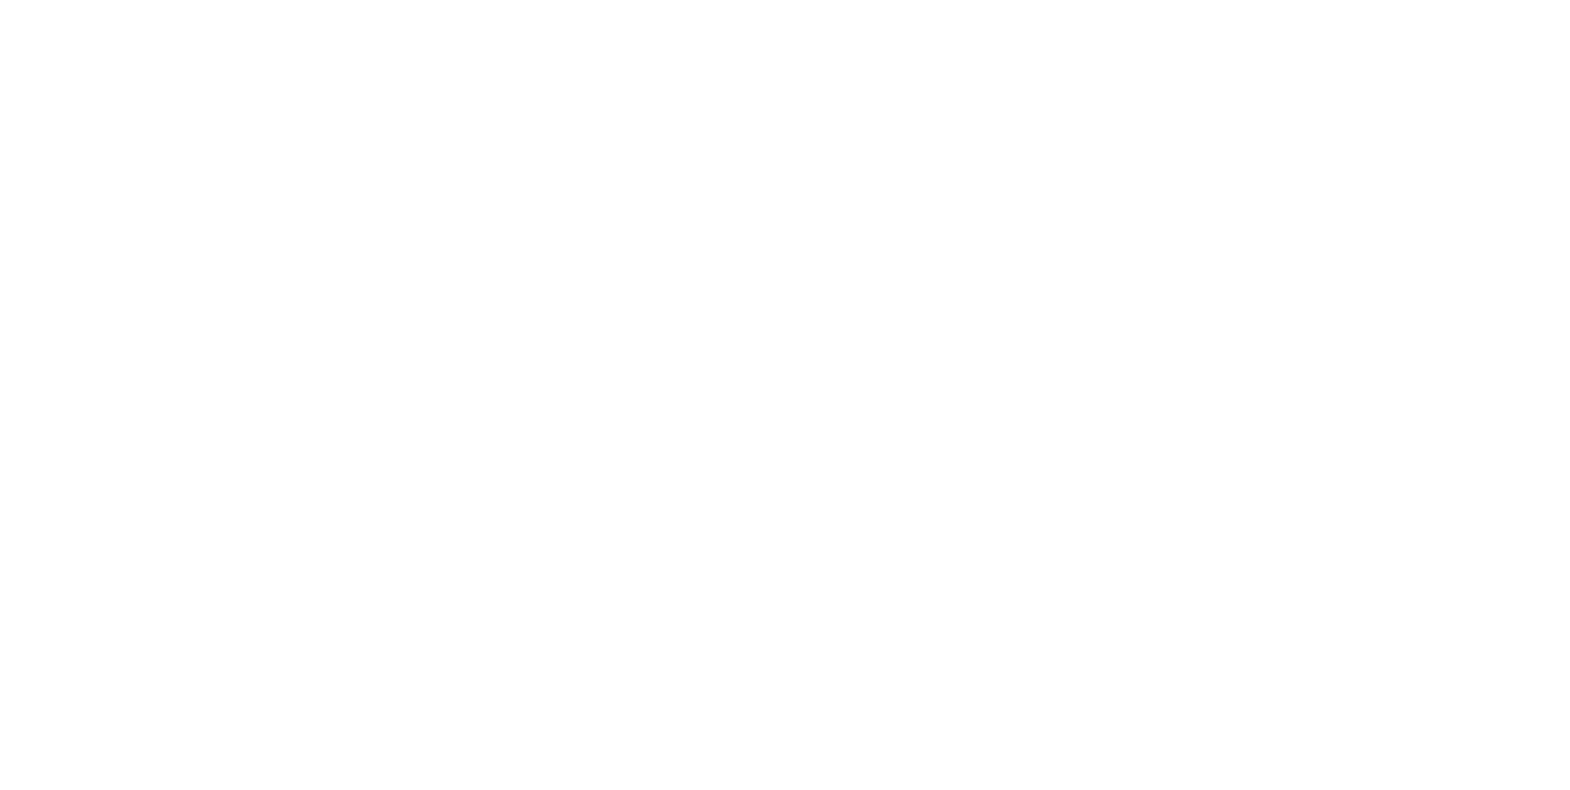

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import joblib

# Cargar los datos
df = pd.read_csv('DS2.csv', delimiter=';', encoding='utf-8')

# Preprocesamiento: Limpieza y codificación de texto
df['TEXTO_SOLICITUD_PREL'] = df['TEXTO_SOLICITUD_PREL'].fillna('')

# Codificar las etiquetas
le_tdoc = LabelEncoder()
df['NOMBRE_TDOC'] = le_tdoc.fit_transform(df['NOMBRE_TDOC'])

le_sdoc = LabelEncoder()
df['NOMBRE_SDOC'] = le_sdoc.fit_transform(df['NOMBRE_SDOC'])

# Vectorización del texto
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['TEXTO_SOLICITUD_PREL'])

# Etiquetas
y_tdoc = df['NOMBRE_TDOC']
y_sdoc = df['NOMBRE_SDOC']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_tdoc_train, y_tdoc_test = train_test_split(X, y_tdoc, test_size=0.2, random_state=42)
_, _, y_sdoc_train, y_sdoc_test = train_test_split(X, y_sdoc, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest para NOMBRE_TDOC
rf_tdoc = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tdoc.fit(X_train, y_tdoc_train)

# Predicción y evaluación para NOMBRE_TDOC
y_tdoc_pred = rf_tdoc.predict(X_test)
tdoc_accuracy = accuracy_score(y_tdoc_test, y_tdoc_pred)
print(f'Accuracy for NOMBRE_TDOC: {tdoc_accuracy}')

# Generar el reporte de clasificación usando solo las clases presentes en el conjunto de prueba
labels_present = sorted(set(y_tdoc_test) | set(y_tdoc_pred))
print(classification_report(y_tdoc_test, y_tdoc_pred, labels=labels_present, target_names=le_tdoc.inverse_transform(labels_present)))

# Ahora para NOMBRE_SDOC
correct_indices = (y_tdoc_pred == y_tdoc_test)

# Aplica correct_indices solo a X_test y y_sdoc_test
X_test_sdoc = X_test[correct_indices]
y_sdoc_correct = y_sdoc_test[correct_indices]

# Dividir el conjunto correcto para el entrenamiento y prueba de NOMBRE_SDOC
X_train_sdoc, X_test_sdoc, y_sdoc_train, y_sdoc_test_correct = train_test_split(X_test_sdoc, y_sdoc_correct, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest para NOMBRE_SDOC
rf_sdoc = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sdoc.fit(X_train_sdoc, y_sdoc_train)

# Predicción y evaluación para NOMBRE_SDOC
y_sdoc_pred = rf_sdoc.predict(X_test_sdoc)
sdoc_accuracy = accuracy_score(y_sdoc_test_correct, y_sdoc_pred)
print(f'Accuracy for NOMBRE_SDOC: {sdoc_accuracy}')

# Generar el reporte de clasificación usando solo las clases presentes en el conjunto de prueba
labels_present_sdoc = sorted(set(y_sdoc_test_correct) | set(y_sdoc_pred))
print(classification_report(y_sdoc_test_correct, y_sdoc_pred, labels=labels_present_sdoc, target_names=le_sdoc.inverse_transform(labels_present_sdoc)))



In [ ]:
X_test.shape

(23898, 5000)

In [ ]:


# Guardar los modelos
joblib.dump(rf_tdoc, 'rf_tdoc_model.joblib')
joblib.dump(rf_sdoc, 'rf_sdoc_model.joblib')




Predicción para NOMBRE_TDOC: Solicitudes
Predicción para NOMBRE_SDOC: Otras solicitudes tributarias


In [ ]:
# Predicción y evaluación para NOMBRE_TDOC
y_tdoc_pred = rf_tdoc.predict(X_test)
tdoc_accuracy = accuracy_score(y_tdoc_test, y_tdoc_pred)
print(f'Accuracy for NOMBRE_TDOC: {tdoc_accuracy}')

# Generar el reporte de clasificación usando solo las clases presentes en el conjunto de prueba
labels_present = sorted(set(y_tdoc_test) | set(y_tdoc_pred))
classification_report_tdoc = classification_report(y_tdoc_test, y_tdoc_pred, labels=labels_present, target_names=le_tdoc.inverse_transform(labels_present))
print("Classification Report for NOMBRE_TDOC:")
print(classification_report_tdoc)



Accuracy for NOMBRE_TDOC: 0.8589003263871454
Classification Report for NOMBRE_TDOC:
                                            precision    recall  f1-score   support

Alteraciones Catastrales de Orden Jurídico       0.72      0.28      0.41       494
                       Beneficios Fiscales       0.96      0.96      0.96      4221
                             Declaraciones       0.89      0.96      0.92      7624
                         Declaraciones IAE       0.50      0.03      0.06        30
                        Declaraciones IVTM       0.81      0.36      0.50       159
                  Declaraciones Tasas y PP       0.90      0.86      0.88       210
             Derivación de Responsabilidad       0.65      0.27      0.39        62
                              Devoluciones       0.80      0.33      0.47       321
                      Devolución de Avales       1.00      0.25      0.40         4
                      Documentos Ejecutiva       0.87      0.95      0.91  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Predicción y evaluación para NOMBRE_SDOC
y_sdoc_pred = rf_sdoc.predict(X_test_sdoc)
sdoc_accuracy = accuracy_score(y_sdoc_test_correct, y_sdoc_pred)
print(f'Accuracy for NOMBRE_SDOC: {sdoc_accuracy}')

# Generar el reporte de clasificación usando solo las clases presentes en el conjunto de prueba
labels_present_sdoc = sorted(set(y_sdoc_test_correct) | set(y_sdoc_pred))
classification_report_sdoc = classification_report(y_sdoc_test_correct, y_sdoc_pred, labels=labels_present_sdoc, target_names=le_sdoc.inverse_transform(labels_present_sdoc))
print("Classification Report for NOMBRE_SDOC:")
print(classification_report_sdoc)


Accuracy for NOMBRE_SDOC: 0.8697028738431564
Classification Report for NOMBRE_SDOC:
                                                 precision    recall  f1-score   support

                                Alta Tasas y PP       0.53      0.79      0.63        24
                                 Alta en el IAE       0.90      0.92      0.91        75
                         Alta y Baja Simultanea       0.00      0.00      0.00         1
         Altas y otras alteraciones catastrales       1.00      0.50      0.67         2
                       Alzamientos manuales C63       1.00      1.00      1.00         2
                      Apoderamiento Electrónico       1.00      1.00      1.00        32
                      Baja en el Censo del IVTM       1.00      0.18      0.31        11
                        Beneficios fiscales IAE       1.00      0.11      0.20         9
       Beneficios fiscales IVTM - O.Tributarios       0.93      0.98      0.96       478
                         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
# Ejemplo de un nuevo texto para predecir
nuevo_texto = "SOLICITO LA DEVOLUCION POR INGRESOS INDEBIDOS, EL VEHICULO FINALMENTE SE VA A MATRICULAR EN MULA ( MURCIA) NO EN MULA CAPITAL Y POR ERROR SE HA PAGADO AHI ADJUNTO NUMERO DE CUENTA ES88 3081 0224 41 1102628722"

# Verificar si el texto es válido
if not isinstance(nuevo_texto, str) or len(nuevo_texto.strip()) == 0:
    print("Error: El texto proporcionado es inválido.")
else:
    # Preprocesamiento del texto (mismo que se utilizó durante el entrenamiento)
    nuevo_texto_vectorizado = vectorizer.transform([nuevo_texto])

    # Predicción de NOMBRE_TDOC
    prediccion_tdoc = rf_tdoc.predict(nuevo_texto_vectorizado)
    nombre_tdoc_predicho = le_tdoc.inverse_transform(prediccion_tdoc)
    print(f'Predicción para NOMBRE_TDOC: {nombre_tdoc_predicho[0]}')

    # Predicción de NOMBRE_SDOC (basada en la predicción de NOMBRE_TDOC)
    prediccion_sdoc = rf_sdoc.predict(nuevo_texto_vectorizado)
    nombre_sdoc_predicho = le_sdoc.inverse_transform(prediccion_sdoc)
    print(f'Predicción para NOMBRE_SDOC: {nombre_sdoc_predicho[0]}')

Predicción para NOMBRE_TDOC: Recursos
Predicción para NOMBRE_SDOC: Otras solicitudes tributarias
